In [1]:
# https://www.youtube.com/watch?v=x-5VNCX8s14
    
# DUMMY VARIABLES: https://www.statlect.com/fundamentals-of-statistics/dummy-variable

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table
from scipy.special import gamma, loggamma, factorial
import scipy.stats
from scipy.interpolate import interp1d
from matplotlib.ticker import AutoMinorLocator 
from matplotlib import rc, font_manager
from matplotlib.lines import Line2D
from matplotlib import colors as mcolors
from mycolorpy import colorlist as mcp
from matplotlib import legend_handler
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import collections
import matplotlib
import shapely.geometry
from shapely.geometry import Point
import shapely.ops 
from geopy.geocoders import Nominatim
import geopandas as gpd
import mapclassify
import jenkspy
import contextily as cx
import os
import rioxarray as rx
import pyreadr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import datasets, linear_model
from sklearn import metrics
# import plots
import seaborn as sns
from datetime import datetime

In [3]:
wd = '/Users/carmen/Library/CloudStorage/OneDrive-TheUniversityofLiverpool/Research/RECAST/latin-mobility-covid-local-files'


country = 'Argentina'

if country=='Argentina':
    country_short = 'ARG'
    country_code = 'AR'
elif country == 'Chile':
    country_short = 'CHL'
    country_code = 'CL'
elif country == 'Colombia':
    country_short = 'COL'
    country_code = 'CO'
elif country == 'Mexico':
    country_short = 'MEX'
    country_code = 'MX'

In [4]:
movcell_baseline_imput_pop = gpd.read_file(wd + '/data/outputs/' + country_short + '/grids-with-data/movcell-baseline-imput-pop-with-exo-var/movcell-baseline-imput-pop-with-exo-var.gpkg')
movcell_baseline_imput_pop['FID'] = movcell_baseline_imput_pop.index

baseline_mov = pd.read_csv(wd + '/data/outputs/' + country_short + '/baseline/baseline_mov.csv')
baseline_mov = baseline_mov.fillna(-1)
baseline_mov = baseline_mov.replace(-999, -1)

# grid_pop = pd.merge(grid_pop, baseline_pop, on='FID', how='left')

In [5]:
index_to_drop = []
for i in range(len(baseline_mov)):
    if baseline_mov.loc[i, 'O'] == baseline_mov.loc[i, 'D']:
        index_to_drop.append(i)
#     if -1 in baseline_mov.loc[i, :].values:
#         index_to_drop.append(i)
baseline_mov_dist = baseline_mov.drop(index_to_drop, axis=0).reset_index(drop=True)


In [6]:
baseline_mov_imput_sim = baseline_mov_dist.copy()


In [7]:
n_class = 0
n_labels_density = 5
n_class_labels_density = {}
for i in range(n_labels_density):
    for j in range(n_labels_density):
        n_class += 1
        n_class_labels_density[n_class-1] = [i, j]
        
n_class = 0
n_labels_rdi = 5
n_class_labels_rdi = {}
for i in range(n_labels_rdi):
    for j in range(n_labels_rdi):
        n_class += 1
        n_class_labels_rdi[n_class-1] = [i+1, j+1]
        

In [8]:
# # Only uncomment if I want to generate table of explanatory variables for SIM

# y = []
# O = []
# D = []
# pop_O = []
# pop_D = []
# wday = []
# OD_class_density = []
# OD_class_rdi = []
# dist = []
# index_m1_flat = []
# index_m1_pair = []

# n_class = 0
# n_labels_density = 5
# n_class_labels_density = {}
# for i in range(n_labels_density):
#     for j in range(n_labels_density):
#         n_class += 1
#         n_class_labels_density[n_class-1] = [i, j]
        
# n_class = 0
# n_labels_rdi = 5
# n_class_labels_rdi = {}
# for i in range(n_labels_rdi):
#     for j in range(n_labels_rdi):
#         n_class += 1
#         n_class_labels_rdi[n_class-1] = [i+1, j+1]

# count = 0
# for i in range(len(baseline_mov_imput_sim)):
#     for j in range(7):
#         y.append(baseline_mov_imput_sim.loc[i, str(j)])
#         wday.append(str(j))
        
#         if baseline_mov_imput_sim.loc[i, str(j)] == -1:
#             index_m1_flat.append(count)
#             index_m1_pair.append([i, str(j)])
#         try:
#             pop_origin = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'O']].reset_index(drop=True).loc[0, str(j)]
#         except:
#             print(i, 'O')
#             pop_origin = np.nan
#         pop_O.append(pop_origin)
#         O.append(baseline_mov_imput_sim.loc[i, 'O'])
        
#         try:
#             pop_destination = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'D']].reset_index(drop=True).loc[0, str(j)]
#         except:
#             print(i, 'D')
#             pop_destination = np.nan
#         pop_D.append(pop_destination)
#         D.append(baseline_mov_imput_sim.loc[i, 'D'])
        
#         try:
#             O_class_density = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'O']].reset_index(drop=True).loc[0, 'class_density']
#             D_class_density = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'D']].reset_index(drop=True).loc[0, 'class_density']
#         except:
#             O_class_density = np.nan
#             D_class_density = np.nan
            
#         try:
#             O_class_rdi = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'O']].reset_index(drop=True).loc[0, 'class_rdi']
#             D_class_rdi = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'D']].reset_index(drop=True).loc[0, 'class_rdi']
#         except:
#             O_class_rdi = np.nan
#             D_class_rdi = np.nan
            
#         try:
#             OD_class_density.append([key for key, value in n_class_labels_density.items() if value == [O_class_density, D_class_density]][0])
#         except:
#             OD_class_density.append(np.nan)
            
#         try:
#             OD_class_rdi.append([key for key, value in n_class_labels_rdi.items() if value == [O_class_rdi, D_class_rdi]][0])
#         except:
#             OD_class_rdi.append(np.nan)
            
#         movcell_baseline_imput_pop = movcell_baseline_imput_pop.to_crs('epsg:3857')
        
#         try:
#             O_centroid = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'O']].reset_index(drop=True).loc[0, 'geometry'].centroid
#             D_centroid = movcell_baseline_imput_pop[movcell_baseline_imput_pop['FID']==baseline_mov_imput_sim.loc[i, 'D']].reset_index(drop=True).loc[0, 'geometry'].centroid
#             dist.append(O_centroid.distance(D_centroid))
#         except:
#             dist.append(np.nan)
            
#         count += 1
        
#     if i % 1000 == 0:
#         print(i/len(baseline_mov_imput_sim)*100)
        
# obs = [True for i in range(len(OD_class_density))]
# for index in index_m1_flat:
#     obs[index] = False
    
# data = pd.DataFrame({'y': y, 'O': O, 'D': D, 'OD_class_density': OD_class_density, 'OD_class_rdi': OD_class_rdi, 'dist': dist, 'pop_O': pop_O, 'pop_D': pop_D, 'wday': wday, 'obs': obs})

# data.to_csv(wd + '/data/outputs/' + country_short + '/baseline/movcell-baseline-mov-dist-with-exo-var.csv')


In [9]:
n_class = 0
n_labels_density = 5
n_class_labels_density = {}
for i in range(n_labels_density):
    for j in range(n_labels_density):
        n_class += 1
        n_class_labels_density[n_class-1] = [i, j]
        
n_class = 0
n_labels_rdi = 5
n_class_labels_rdi = {}
for i in range(n_labels_rdi):
    for j in range(n_labels_rdi):
        n_class += 1
        n_class_labels_rdi[n_class-1] = [i, j]
        
# print(n_class_labels)


In [10]:
data = pd.read_csv(wd + '/data/outputs/' + country_short + '/baseline/movcell-baseline-mov-dist-with-exo-var.csv').drop(['Unnamed: 0'],axis=1)


In [11]:
min(data['dist'])

14682.14354525104

In [12]:
print(len(data))
data_test = data[data['obs']==True]
print(len(data_test))
data_test = data_test[data_test['dist']>0]
print(len(data_test))
data_test = data_test[data_test['pop_O']>0]
print(len(data_test))
data_test = data_test[data_test['pop_D']>0]
print(len(data_test))
data_test = data_test[data_test['y']>0].reset_index(drop=True)
print(len(data_test))

445690
14517
14517
14517
14517
14517


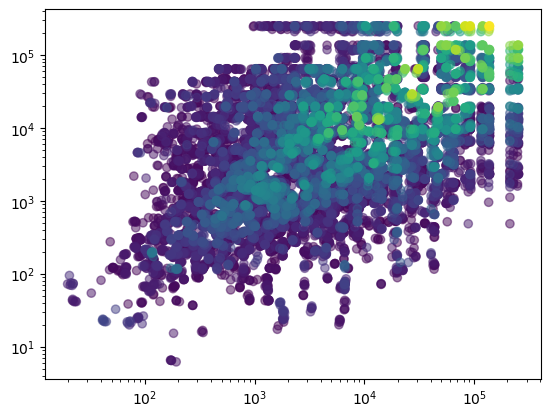

In [13]:
fig, ax = plt.subplots()
data_test = data_test.sort_values(by='y', ascending=True)
ax.scatter(data_test['pop_O'], data_test['pop_D'], c=np.log(data_test['y']), cmap='viridis', alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')

# plt.savefig(wd + '/plots/mov-data-obs-popOD/mov-data-obs-popOD-' + country_short + '.pdf', bbox_inches = 'tight')

plt.show()

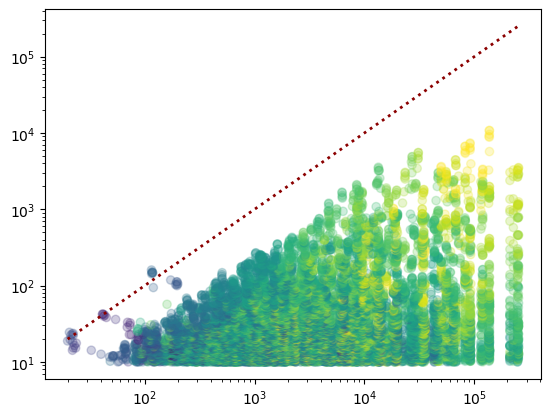

In [14]:
fig, ax = plt.subplots()
ax.scatter(data_test['pop_O'], data_test['y'], c=np.log(data_test['pop_D']), cmap='viridis', alpha=0.25)
x = np.linspace(min(data_test['pop_O']), max(data_test['pop_O']))
ax.plot(x, x, lw=2, color='darkred', linestyle=':')
ax.set_xscale('log')
ax.set_yscale('log')

# plt.savefig(wd + '/plots/mov-data-obs-popO-flow/mov-data-obs-popO-flow-' + country_short + '.pdf', bbox_inches = 'tight')

plt.show()

In [15]:
# data = data_test
dummies_wday = pd.get_dummies(data['wday'], drop_first=True, dtype=int)#.values
dummies_OD_class_density = pd.get_dummies(data['OD_class_density'], drop_first=True, dtype=int)
dummies_OD_class_rdi = pd.get_dummies(data['OD_class_rdi'], drop_first=True, dtype=int)
dummies_OD_class_density = dummies_OD_class_density.rename(columns={col: str(int(col)) + '_class_density' for col in dummies_OD_class_density.columns})#.values
dummies_OD_class_rdi = dummies_OD_class_rdi.rename(columns={col: str(int(col)) + '_class_rdi' for col in dummies_OD_class_rdi.columns})#.values
# dummies_O = pd.get_dummies(data['O'], drop_first=False, dtype=int)
X = data[['dist', 'pop_O', 'pop_D', 'obs', 'y']]
X = pd.concat([dummies_wday, X], axis=1)
# X = pd.concat([dummies_wday, X,  dummies_O, dummies_OD_class_density, dummies_OD_class_rdi], axis=1)
# X = pd.concat([dummies_wday, X, dummies_O], axis=1)
# X = pd.concat([X], axis=1)
X = sm.add_constant(X)

X = X[X['dist']>0].reset_index(drop=True)
X = X[X['pop_O']>0].reset_index(drop=True)
X = X[X['pop_D']>0].reset_index(drop=True)

X_obs = X[X['obs']==True].reset_index(drop=True)
y_obs = X_obs['y']
print(min(y_obs), max(y_obs))
X_obs = X_obs.drop(['obs', 'y'], axis=1)

X_predict = X
X_predict = X_predict.drop(['obs', 'y'], axis=1)


10.0 10747.8


In [16]:
X_predict

,const,1,2,3,4,5,6,dist,pop_O,pop_D
0,1.0,0,0,0,0,0,0,19567.870000,122.880937,499.332563
1,1.0,1,0,0,0,0,0,19567.870000,120.901685,493.498770
2,1.0,0,1,0,0,0,0,19567.870000,121.618392,495.526261
3,1.0,0,0,1,0,0,0,19567.870000,122.805790,499.753264
4,1.0,0,0,0,1,0,0,19567.870000,121.333790,496.757158
...,...,...,...,...,...,...,...,...,...,...
445685,1.0,0,1,0,0,0,0,70552.958637,1587.029410,703.533006
445686,1.0,0,0,1,0,0,0,70552.958637,1579.332694,701.768627
445687,1.0,0,0,0,1,0,0,70552.958637,1580.777818,704.248533
445688,1.0,0,0,0,0,1,0,70552.958637,1522.968181,688.879077


In [17]:
print(len(X_obs))
X_obs_dropna = X_obs.dropna()
print(len(X_obs_dropna))
# X_obs_dropna = X_obs_dropna[X_obs_dropna['pop_O']>1]
# X_obs_dropna = X_obs_dropna[X_obs_dropna['pop_D']>1]
y_obs_dropna = y_obs.iloc[X_obs_dropna.index].reset_index(drop=True)
X_obs_dropna = X_obs_dropna.reset_index(drop=True)

X_obs_dropna['pop_O'] = np.log(X_obs_dropna['pop_O'])
X_obs_dropna['pop_D'] = np.log(X_obs_dropna['pop_D'])
X_obs_dropna['dist'] = np.log(X_obs_dropna['dist'])


14517
14517


In [18]:
## THINK ABOUT MODEL!!

# model = sm.GLM(np.log(y_obs_dropna), X_obs_dropna, family=sm.families.Gaussian())
# res = model.fit()

# model = sm.RLM(np.log(y_obs_dropna), X_obs_dropna, M=sm.robust.norms.HuberT())
# res = model.fit()
# print(res.summary())

model = sm.GLM(np.log(y_obs_dropna), X_obs_dropna, family=sm.families.Poisson())
res = model.fit()
llf_Poisson = res.llf

# model = sm.GLM(np.log(y_obs_dropna), X_obs_dropna, family=sm.families.NegativeBinomial(alpha=1))
# res = model.fit()
# llf_NB = res.llf

# # log likelihood ratio test
# logratio = -2 * (llf_Poisson - llf_NB)
# df = 1 # given the difference in dof
# # compute the p-value
# pvalue = 1 - scipy.stats.chi2(df).cdf(logratio) # since Λ follows χ2
# print('logratio', logratio, 'p-value', pvalue)


In [19]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                14517
Model:                            GLM   Df Residuals:                    14507
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23811.
Date:                Thu, 29 Aug 2024   Deviance:                       2611.5
Time:                        15:19:16   Pearson chi2:                 2.66e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1589
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1151      0.075     41.668      0.000       2.969       3.262
1             -0.0116      0.016     -0.717      0.473      -0.043       0.020
2              0.0033      0.016      0.208      0.836      -0.028       0.035
3              0.0017      0.016      0.103      0.918      -0.030       0.033
4             -0.0081      0.016     -0.497      0.619      -0.040       0.024
5             -0.0222      0.017     -1.345      0.179      -0.055       0.010
6             -0.0345      0.017     -2.069      0.039      -0.067      -0.002
dist          -0.2879      0.008    -37.569      0.000      -0.303      -0.273
pop_O          0.0610      0.003     21.874      0.000       0.056       0.066
pop_D          0.0756      0.003     26.833      0.000       0.070       0.081
==============================================================================
"""

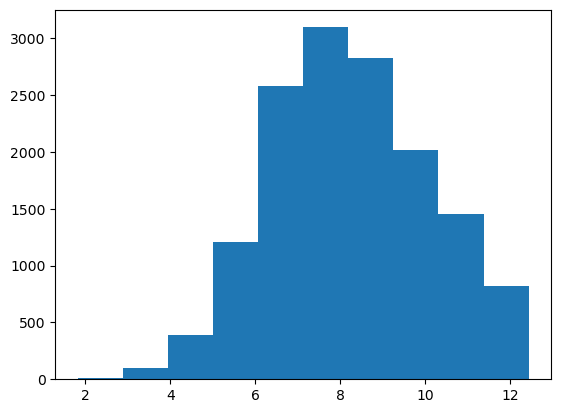

In [20]:
fig, ax = plt.subplots()
plt.hist(X_obs_dropna['pop_D'])
plt.show()

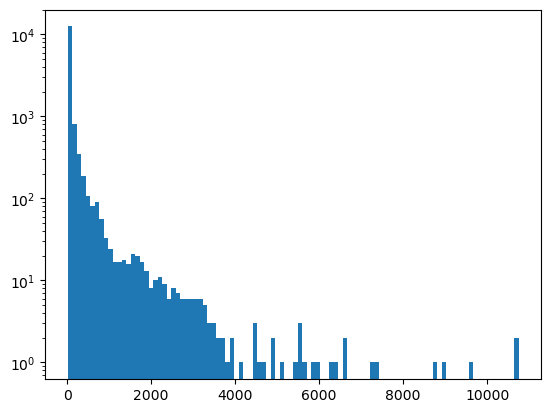

In [21]:
fig, ax = plt.subplots()
plt.hist(y_obs_dropna, bins=100)
ax.set_yscale('log')
plt.show()

In [22]:
print(len(X_predict))
X_predict_dropna = X_predict.dropna()
print(len(X_predict_dropna))
X_predict_dropna = X_predict_dropna.reset_index(drop=True)

X_predict_dropna['pop_O'] = np.log(X_predict_dropna['pop_O'])
X_predict_dropna['pop_D'] = np.log(X_predict_dropna['pop_D'])
X_predict_dropna['dist'] = np.log(X_predict_dropna['dist'])

y_predict = res.predict(X_predict_dropna)

445690
445690


In [23]:
len(data)

445690

In [24]:
data['y_imput'] = data['y']
j = 0
for i in range(len(data)):
    if data.loc[i, 'y_imput'] == -1:
        data.loc[i, 'y_imput'] = y_predict[j]
        j += 1
    else:
        data.loc[i, 'y_imput'] = data.loc[i, 'y']

# data.to_csv(wd + '/data/outputs/' + country_short + '/baseline/movcell-baseline-imput-mov-dist-with-exo-var-flatten.csv')


In [25]:
data

,y,O,D,OD_class_density,OD_class_rdi,dist,pop_O,pop_D,wday,obs,y_imput
0,-1.0,5483.0,5482.0,13,12.0,19567.870000,122.880937,499.332563,0,False,2.811058
1,-1.0,5483.0,5482.0,13,12.0,19567.870000,120.901685,493.498770,1,False,2.773371
2,-1.0,5483.0,5482.0,13,12.0,19567.870000,121.618392,495.526261,2,False,2.816979
3,-1.0,5483.0,5482.0,13,12.0,19567.870000,122.805790,499.753264,3,False,2.815784
4,-1.0,5483.0,5482.0,13,12.0,19567.870000,121.333790,496.757158,4,False,2.785251
...,...,...,...,...,...,...,...,...,...,...,...
445685,-1.0,7303.0,7510.0,23,6.0,70552.958637,1587.029410,703.533006,2,False,1.442228
445686,-1.0,7303.0,7510.0,23,6.0,70552.958637,1579.332694,701.768627,3,False,1.428414
445687,-1.0,7303.0,7510.0,23,6.0,70552.958637,1580.777818,704.248533,4,False,1.405015
445688,-1.0,7303.0,7510.0,23,6.0,70552.958637,1522.968181,688.879077,5,False,1.381263


In [26]:
k = 0

baseline_mov_imput = baseline_mov_dist.copy()

for i in range(len(baseline_mov_imput)):
    for j in range(7):
        if baseline_mov_imput.loc[i, str(j)] == -1:
            baseline_mov_imput.loc[i, str(j)] = data.loc[k, 'y_imput']
        k += 1     

# baseline_mov_imput.to_csv(wd + '/data/outputs/' + country_short + '/baseline/movcell-baseline-imput-mov-dist-with-exo-var-flatten.csv')



### A few tests to validate estiamted baseline

In [27]:

y_predict_test = pd.DataFrame({'y_predict_test': res.predict(X_obs_dropna)})

In [28]:

y_predict_test

,y_predict_test
0,3.032666
1,2.993461
2,3.042546
3,3.038616
4,3.005203
...,...
14512,1.592727
14513,1.891768
14514,1.530352
14515,1.486587


PearsonRResult(statistic=0.7562271566379286, pvalue=0.0)


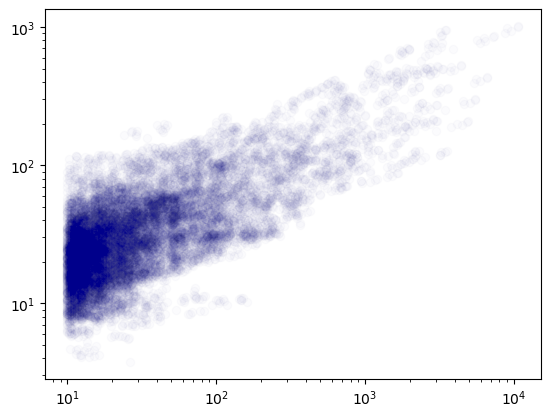

In [32]:
fig, ax = plt.subplots()
# ax.set_xlim([7,20000])
# ax.set_ylim([1,2000])
ax.scatter(y_obs_dropna, np.exp(y_predict_test['y_predict_test']), alpha=0.015, color='darkblue')
print(scipy.stats.pearsonr(y_obs_dropna, np.exp(y_predict_test['y_predict_test'])))
ax.set_xscale('log')
ax.set_yscale('log')

# plt.savefig(wd + '/plots/mov-data-obs-pred-flow/mov-data-obs-pred-flow-' + country_short + '.pdf', bbox_inches = 'tight')

plt.show()

In [33]:
count_ovalue = 0
count_uvalue = 0
value = 10
for i in range(len(y_predict)):
    if np.exp(y_predict[i]) < value:
        count_uvalue += 1
    elif np.exp(y_predict[i]) >= value:
        count_ovalue += 1


In [34]:
count_uvalue/len(y_predict)*100

68.5981287441944

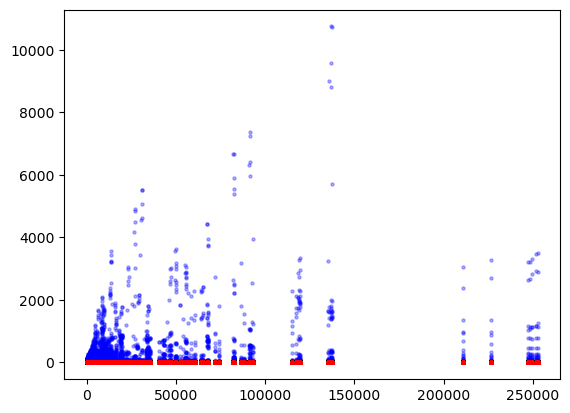

In [35]:
fig, ax = plt.subplots()
ax.scatter(X_predict['pop_O'], y_predict, zorder=2, color='red', s=5, alpha=0.3)
ax.scatter(X_obs['pop_O'], y_obs, zorder= 1, color='blue', s=5, alpha=0.3)

# ax.set_xlim([-50000, 300000])
# ax.set_ylim([-500, 5000])



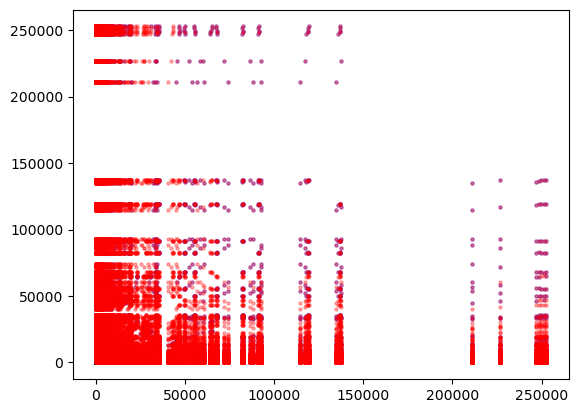

In [36]:
fig, ax = plt.subplots()
ax.scatter(X_obs['pop_O'], X_obs['pop_D'], color='blue', s=5, alpha=0.3)
ax.scatter(X_predict['pop_O'], X_predict['pop_D'], color='red', s=5, alpha=0.3)

plt.show()



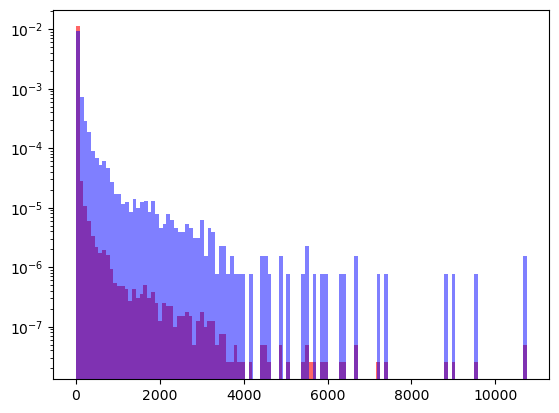

In [37]:
fig, ax = plt.subplots()
ax.hist(data[data['y']>0]['y'], bins=120, density=True, color='blue', alpha=0.5, zorder=3)
ax.hist(data['y_imput'], bins=120, density=True, color='red', alpha=0.6, zorder=2)
ax.set_yscale('log')




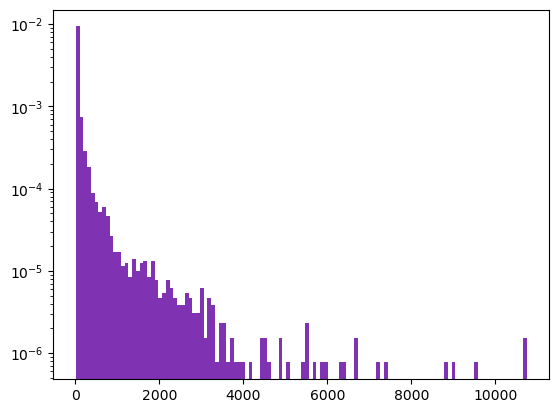

In [38]:
fig, ax = plt.subplots()
ax.hist(data[data['y']>-1]['y'], bins=120, density=True, color='blue', alpha=0.5, zorder=3)
ax.hist(data[data['y']>-1]['y_imput'], bins=120, density=True, color='red', alpha=0.6, zorder=2)
ax.set_yscale('log')

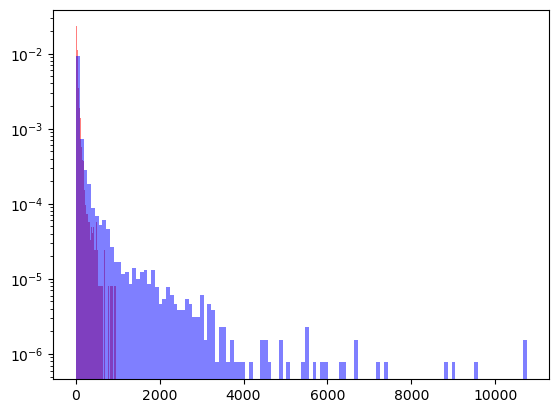

In [50]:
fig, ax = plt.subplots()
ax.hist(y_obs_dropna, bins=120, density=True, color='blue', alpha=0.5, zorder=3)
ax.hist(1*np.exp(y_predict_test['y_predict_test']), bins=120, density=True, color='red', alpha=0.5, zorder=2)
ax.set_yscale('log')


In [47]:
data[data['y']>0]

,y,O,D,OD_class_density,OD_class_rdi,dist,pop_O,pop_D,wday,obs,y_imput
14,11.20,871.0,959.0,24,NaN,43755.060027,2172.875345,2590.454054,0,True,11.20
16,10.40,871.0,959.0,24,NaN,43755.060027,2177.939049,2593.188845,2,True,10.40
18,13.20,871.0,959.0,24,NaN,43755.060027,2177.310537,2602.278978,4,True,13.20
19,10.25,871.0,959.0,24,NaN,43755.060027,2165.273385,2577.367392,5,True,10.25
26,13.25,5594.0,6233.0,24,NaN,238856.143488,39716.229959,2573.496759,5,True,13.25
...,...,...,...,...,...,...,...,...,...,...,...
483034,16.20,1282.0,1202.0,24,NaN,138365.648841,100688.929796,6487.288838,6,True,16.20
631359,13.40,1281.0,1202.0,24,NaN,119026.631712,47595.662356,6279.790881,1,True,13.40
631364,10.80,1281.0,1202.0,24,NaN,119026.631712,44649.655025,6487.288838,6,True,10.80
919623,11.75,2113.0,1826.0,23,NaN,97839.288579,1357.768836,637.583172,5,True,11.75


In [46]:
max(data['y'])

38457.2

In [32]:
len(y_obs)

37328